In [1]:
import pyPROPOSAL as pp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NuMuDef = pp.particle.NuMuDef.get()
config_rock = "../../config_rock_neutrino.json"

In [3]:
NuMu = pp.particle.Particle(NuMuDef)
Direction = pp.Vector3D(0,0,-1)
Position = pp.Vector3D(0,0,6374134000000)
Energy = 1e7

In [4]:
def propagate(particleDef, config, direction, pos, e):
    prop = pp.Propagator(particleDef, config)
    particle = prop.particle
    particle.direction = direction
    particle.position = pos
    particle.energy = e
    particle_start = pp.particle.Particle(particle)
    secondarys = prop.propagate()
    particlepath = np.array([[particle_start.position.x, particle_start.position.y, particle_start.position.z]])
    for secondary in secondarys:
        particlepath = np.append(particlepath, [[secondary.position.x, secondary.position.y, secondary.position.z]], axis=0)
    return particlepath, secondarys

In [5]:
def propagate_and_plot(particleDef, config, direction, pos, e, colour):
    particlepath, secondarys = propagate(particleDef, config, direction, pos, e)
    plt.plot(particlepath[:,0],particlepath[:,2], c = colour)
    for secondary in secondarys:
        if secondary.id == pp.particle.Data.Particle:
            particleId = secondary.particle_def.particle_id
            if (abs(particleId) < 20 and abs(particleId) > 10 and particleId%2==1):
                config = "../../config_rock_lepton.json"
                propagate_and_plot(secondary.particle_def, config, secondary.direction, secondary.position, secondary.energy, 'k')
            elif (abs(particleId) < 20 and abs(particleId) > 10 and particleId%2==0):
                config = "../../config_rock_neutrino.json"
                propagate_and_plot(secondary.particle_def, config, secondary.direction, secondary.position, secondary.energy, 'b')
            elif (particleId==21):
                config = "../../config_rock_gamma.json"
                propagate_and_plot(secondary.particle_def, config, secondary.direction, secondary.position, secondary.energy, 'orange')

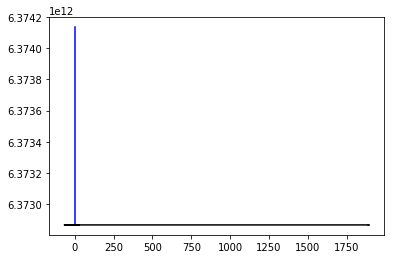

In [6]:
propagate_and_plot(NuMu.particle_def, config_rock, Direction, Position, Energy, 'b')

In [7]:
NuTauDef = pp.particle.NuTauDef.get()

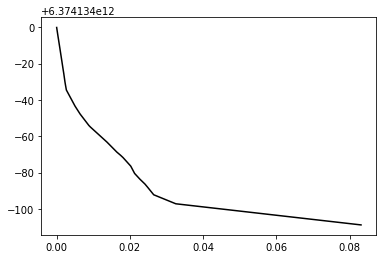

In [8]:
propagate_and_plot(NuTauDef, config_rock, Direction, Position, Energy, 'b')